In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Загрузка изображения:

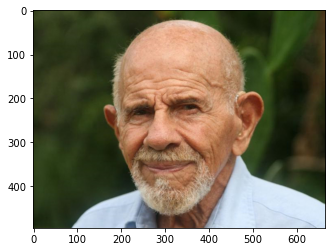

In [2]:
image = cv2.imread("D:\photo.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Нахождение лица на изображении:

In [3]:
path = r'C:\Users\wowul\anaconda3\pkgs\libopencv-4.0.1-hbb9e17c_0\Library\etc\haarcascades\haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray_image, 1.1, 5)
face.shape

(1, 4)

Вырезание всего кроме лица на изображении:

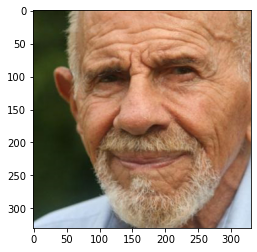

In [4]:
cropped = image[face[0][0]:face[0][0] + face[0][3], face[0][0]:face[0][0] + face[0][3]] 
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

Границы обьектов с использованием метода Кенни:

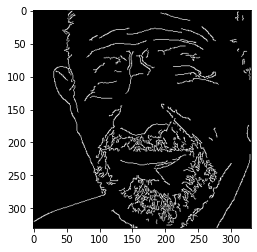

In [5]:
gray_image = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
bounds = cv2.Canny(gray_image, 100, 200)
plt.imshow(bounds,cmap="gray")

Удаление границ, длина и ширина которых < 10:

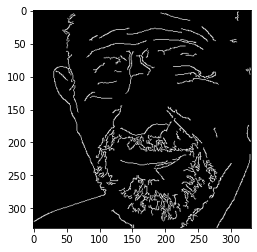

In [6]:
w, h = bounds.shape
numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(bounds, 4)
for x in range(0, w):
    for y in range(0, h):
        if stats[labels[x, y], cv2.CC_STAT_WIDTH] < 10 and stats[labels[x, y], cv2.CC_STAT_HEIGHT] < 10:
            bounds[x, y] = 0            
plt.imshow(bounds, cmap="gray")

Операция расширения:

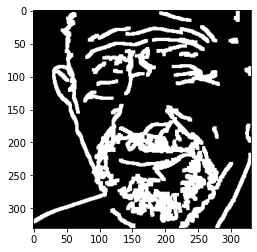

In [7]:
kernel = np.ones((5, 5), dtype=np.uint8)
dilated = cv2.dilate(bounds, kernel, 1)
plt.imshow(dilated,cmap="gray")

Применение фильтра Гаусса и нормализация полученного изображения:

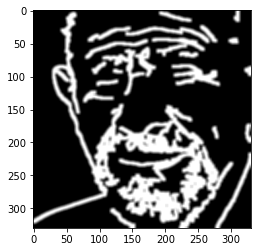

In [8]:
arr = np.array([])
blur = cv2.GaussianBlur(dilated, (5,5), cv2.BORDER_DEFAULT)
M = cv2.normalize(blur, arr, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)

plt.imshow(M, cmap="gray")

Билатеральный фильтр:

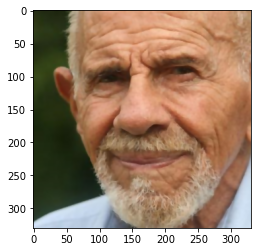

In [9]:
bileterial = cv2.bilateralFilter(cropped, 5, 50, 100)
plt.imshow(cv2.cvtColor(bileterial, cv2.COLOR_BGR2RGB))

Повышение резкости изображения:

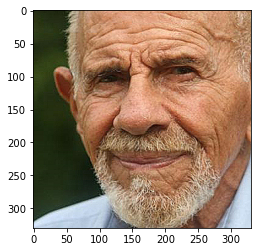

In [10]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(cropped, -1, kernel)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))

Финальная фильтрация:

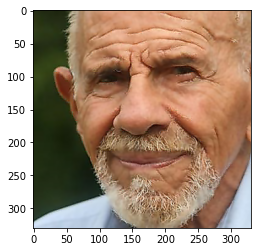

In [11]:
result = np.zeros(cropped.shape, dtype=np.uint8)
w, h, channel = result.shape

for x in range(0, w):
    for y in range(0, h):
        for c in range(0, channel):
            result[x, y, c] = M[x, y] * sharpened[x, y, c] + (1 - M[x, y]) * bileterial[x, y, c]
            
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))